In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

## Load Data

In [2]:
data = pd.read_csv("dataset/data.csv")

# Explore Data

In [3]:
pd.set_option('display.max_columns', None)
print(data.columns)
print(data.head(5))
print(data.describe())

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42

## Preprocess Data

In [4]:
features_mean = list(data.columns[2:12])
features_se = list(data.columns[12:22])
features_worst = list(data.columns[22:32])

## Clean Data

In [5]:
data.drop("id", axis=1, inplace=True)  # ID列没有用，删除该列
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  # 将B良性替换为0，M恶性替换为1

## Explore Data

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


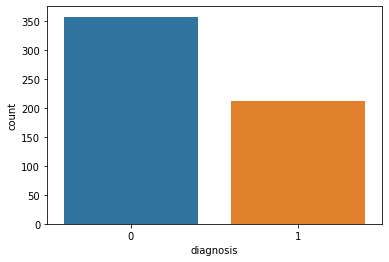

In [6]:
# 将肿瘤诊断结果可视化
sns.countplot(data['diagnosis'], label="Count")
plt.show()

In [7]:
# 用热力图呈现features_mean字段之间的相关性
corr = data[features_mean].corr()
plt.figure(figsize=(14, 14))

<Figure size 1008x1008 with 0 Axes>

<Figure size 1008x1008 with 0 Axes>

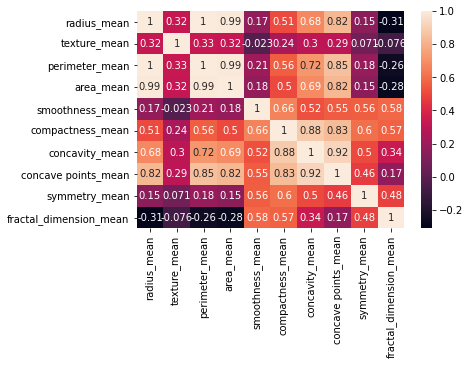

In [8]:
# annot=True显示每个方格的数据
sns.heatmap(corr, annot=True)
plt.show()

In [9]:
features_remain = data.columns[1:31]  # 特征选择
X, y = train_test_split(data, test_size=0.3)  # 抽取30%的数据作为测试集，其余作为训练集
# 抽取特征选择的数值作为训练和测试数据
X_train = X[features_remain]
y_train = X['diagnosis']
X_test = y[features_remain]
y_test = y['diagnosis']

In [10]:
# 采用Z-Score规范化数据，保证每个特征维度的数据均值为0，方差为1
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

## Train & Predict

In [11]:
svmClassifier = svm.LinearSVC()
svmClassifier.fit(X_train, y_train)
y_test_predict = svmClassifier.predict(X_test)  # 用测试集做预测
print(u'score 准确率为 %.4lf' % metrics.accuracy_score(y_test_predict, y_test))

score 准确率为 0.9649
